# **SENTIMENTAL ANALYSIS OF TWITTER DATA**

**IMPORTING MODULES**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('TSA.csv')

# Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Removing stopwords and stemming
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['processed_tweet'] = df['tweet'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the data
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_tweet'])
y = df['label']

# Apply Near Miss and SMOTE
nm = NearMiss()
X_resampled_nm, y_resampled_nm = nm.fit_resample(X_tfidf, y)

smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_tfidf, y)

# Split the data into train and test sets
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_resampled_nm, y_resampled_nm, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB()
}

for name, model in models.items():
    print(f"Training and evaluating {name} model...")
    # Using Near Miss
    model.fit(X_train_nm, y_train_nm)
    y_pred_nm = model.predict(X_test_nm)
    print(f"Near Miss {name} Accuracy: {accuracy_score(y_test_nm, y_pred_nm)}")
    print(f"Near Miss {name} Classification Report:\n{classification_report(y_test_nm, y_pred_nm)}")

    # Using SMOTE
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test_smote)
    print(f"SMOTE {name} Accuracy: {accuracy_score(y_test_smote, y_pred_smote)}")
    print(f"SMOTE {name} Classification Report:\n{classification_report(y_test_smote, y_pred_smote)}")
    print()

# Save TF-IDF Vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training and evaluating SVM model...
Near Miss SVM Accuracy: 0.8294314381270903
Near Miss SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       443
           1       0.83      0.84      0.83       454

    accuracy                           0.83       897
   macro avg       0.83      0.83      0.83       897
weighted avg       0.83      0.83      0.83       897

SMOTE SVM Accuracy: 0.9775403768506057
SMOTE SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5892
           1       0.96      1.00      0.98      5996

    accuracy                           0.98     11888
   macro avg       0.98      0.98      0.98     11888
weighted avg       0.98      0.98      0.98     11888


Training and evaluating Logistic Regression model...
Near Miss Logistic Regression Accuracy: 0.810479375696767
Near Miss Logistic Regression Classification 

['tfidf_vectorizer.joblib']

In [ ]:
import joblib
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Assuming you have trained models and want to save them
svm_model_nm = SVC()
svm_model_nm.fit(X_train_nm, y_train_nm)
joblib.dump(svm_model_nm, 'svm_model_nm.joblib')

logreg_model_smote = LogisticRegression()
logreg_model_smote.fit(X_train_smote, y_train_smote)
joblib.dump(logreg_model_smote, 'logreg_model_smote.joblib')

nb_model = MultinomialNB()
nb_model.fit(X_train_nm, y_train_nm)  # You can use any dataset for training here
joblib.dump(nb_model, 'nb_model.joblib')

['nb_model.joblib']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

**LOADING THE DATASET**

In [ ]:
df = pd.read_csv('TSA.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


**PREPROCESSING THE DATASET**

In [ ]:
df.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
31957,False,False,False
31958,False,False,False
31959,False,False,False
31960,False,False,False


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [ ]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [ ]:
df.tail()

,id,label,tweet,clean_tweet
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised in in #calgary #wso...
31961,31962,0,thank you @user for you follow,thank you for you follow


In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


**TOKENISATION**

In [ ]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [ ]:
# Display the 'clean_tweet' column before and after splitting
df_output = pd.DataFrame({
    'Before Splitting': df['clean_tweet'],
    'After Splitting': df['clean_tweet'].apply(lambda x: x.split())
})

# Print the dataframe with highlighted column names
print(df_output.head())

                                    Before Splitting  \
0  when father dysfunctional selfish drags kids i...   
1  thanks #lyft credit cause they offer wheelchai...   
2                                bihday your majesty   
3                         #model love take with time   
4                     factsguide society #motivation   

                                     After Splitting  
0  [when, father, dysfunctional, selfish, drags, ...  
1  [thanks, #lyft, credit, cause, they, offer, wh...  
2                            [bihday, your, majesty]  
3                   [#model, love, take, with, time]  
4                 [factsguide, society, #motivation]  


**STEMMING**

In [ ]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def analyze_sentiment(tweet):
    stop_words = set(stopwords.words('english'))

    # Tokenize the tweet
    words = word_tokenize(tweet)

    # Remove stopwords
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    print(filtered_words)
    # Reconstruct the tweet without stopwords
    clean_tweet = ' '.join(filtered_words)
    print(clean_tweet)


In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
original_tokenized_tweet = tokenized_tweet.copy()
print(" Before Stemming:")
print(original_tokenized_tweet.head())
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])


print("\n After Stemming:")
print(tokenized_tweet.head())

 Before Stemming:
0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: clean_tweet, dtype: object

 After Stemming:
0    [w, h, e, n,  , f, a, t, h, e, r,  , d, y, s, ...
1    [t, h, a, n, k,  , #, l, y, f, t,  , c, r, e, ...
2    [b, i, h, d, a, y,  , y, o, u, r,  , m, a, j, ...
3    [#, m, o, d, e, l,  , l, o, v, e,  , t, a, k, ...
4    [f, a, c, t, s, g, u, i, d,  , s, o, c, i, e, ...
Name: clean_tweet, dtype: object


**EXPLORATORY DATA ANALYSIS**

In [ ]:
# !pip install wordcloud

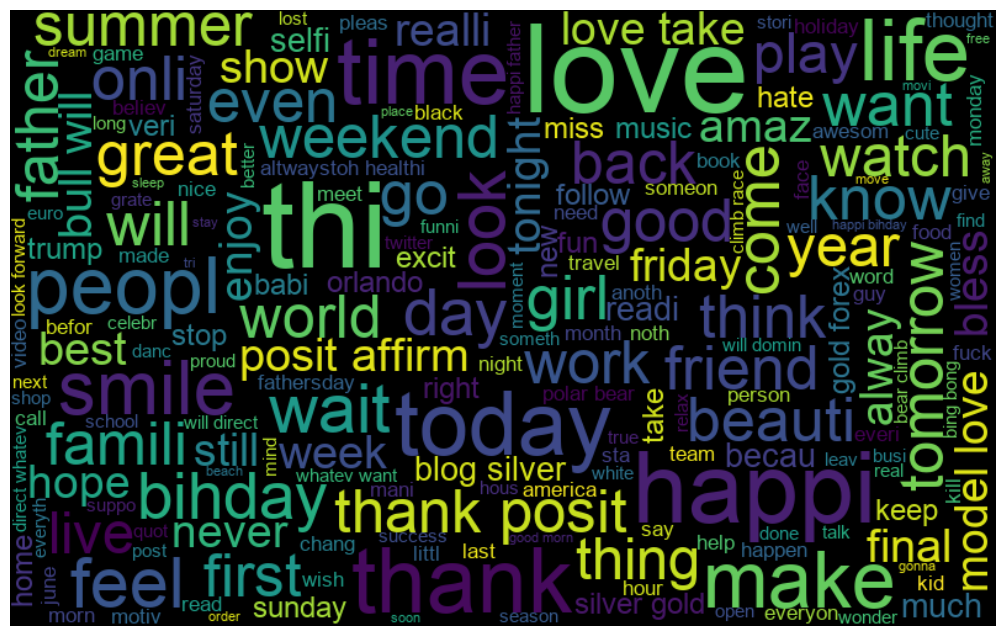

In [ ]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='arial.ttf',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**VISULISING FREQUENT +VE TWEETS**

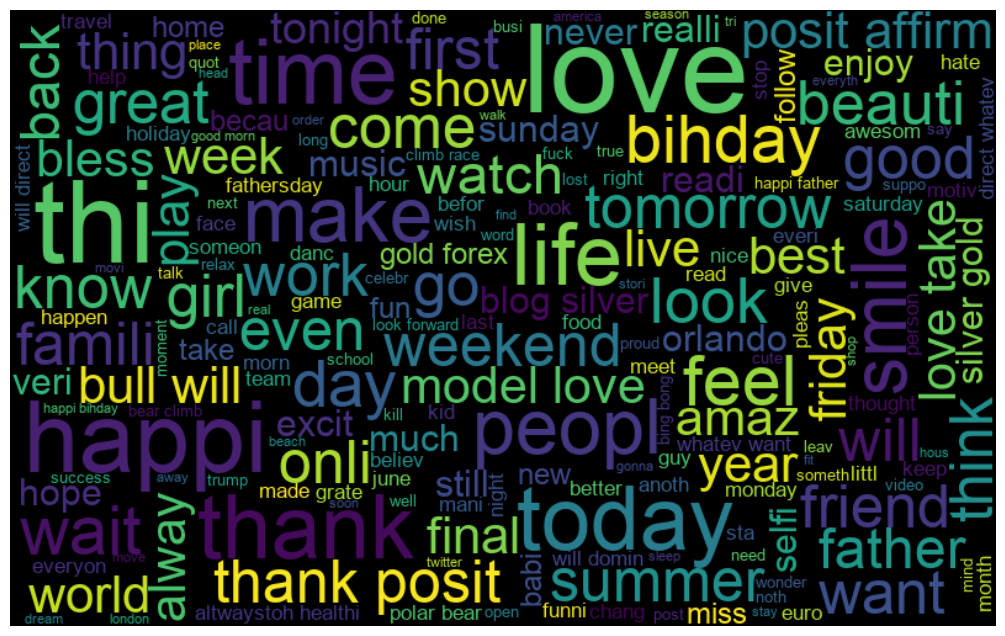

In [ ]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(font_path='arial.ttf',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**VISULISING FREQUENT -VE TWEETS**

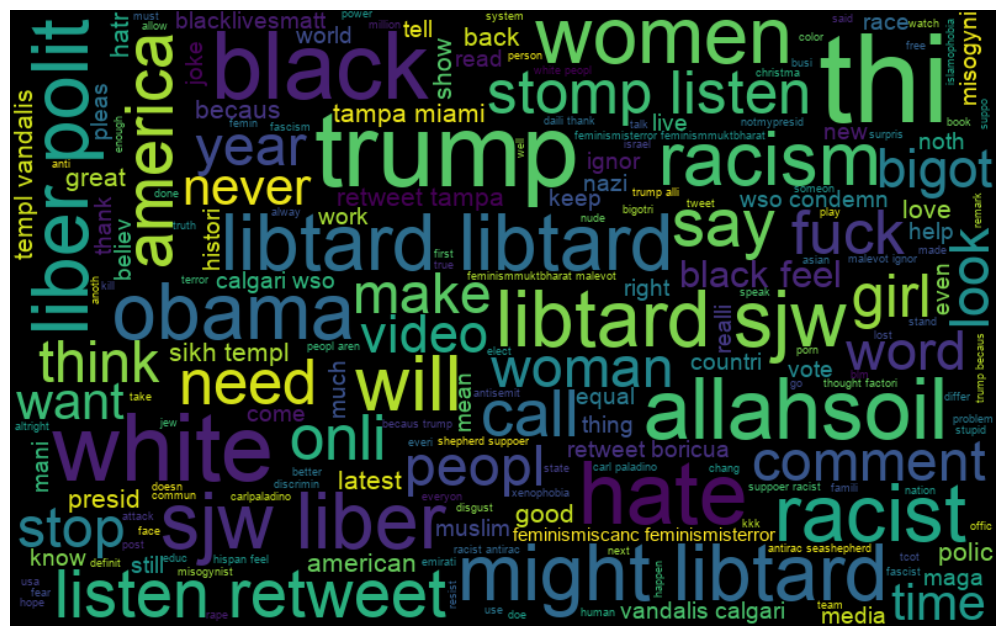

In [ ]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(font_path='arial.ttf',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**EXTRACTING HASTAGS ( +VE & -VE )**

In [ ]:
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [ ]:
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [ ]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [ ]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [ ]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [ ]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


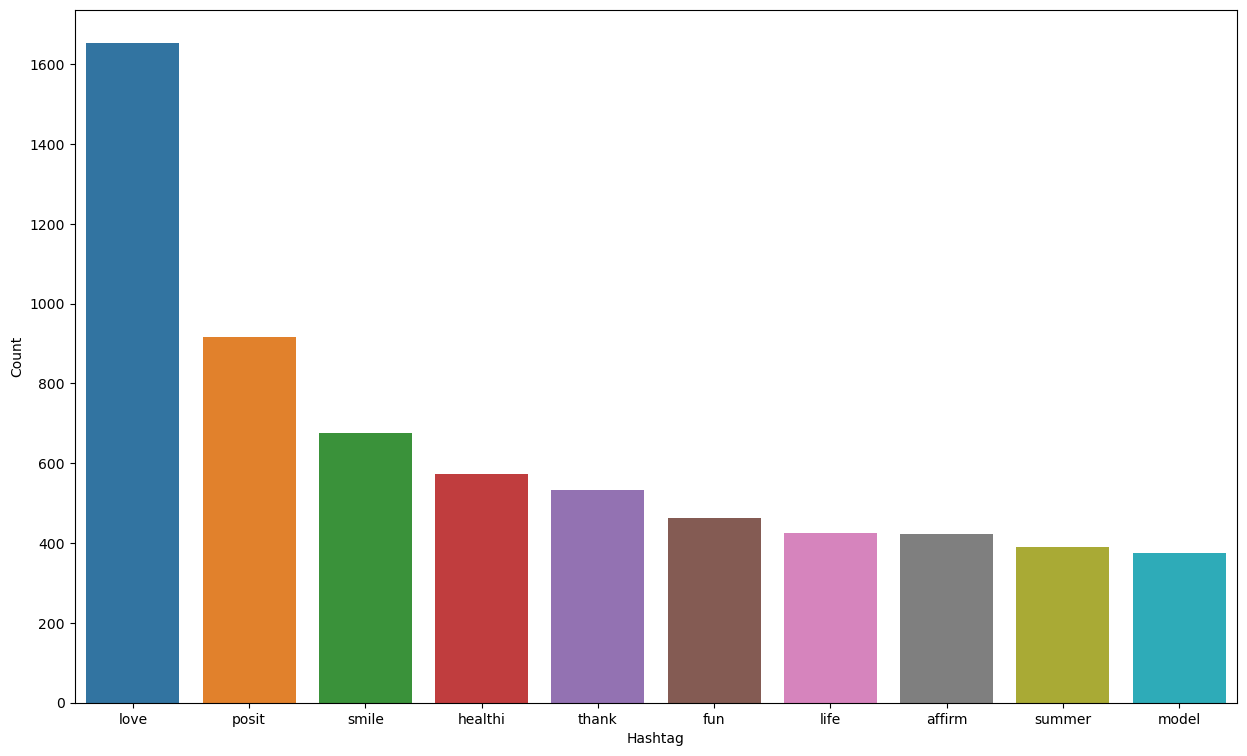

In [ ]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

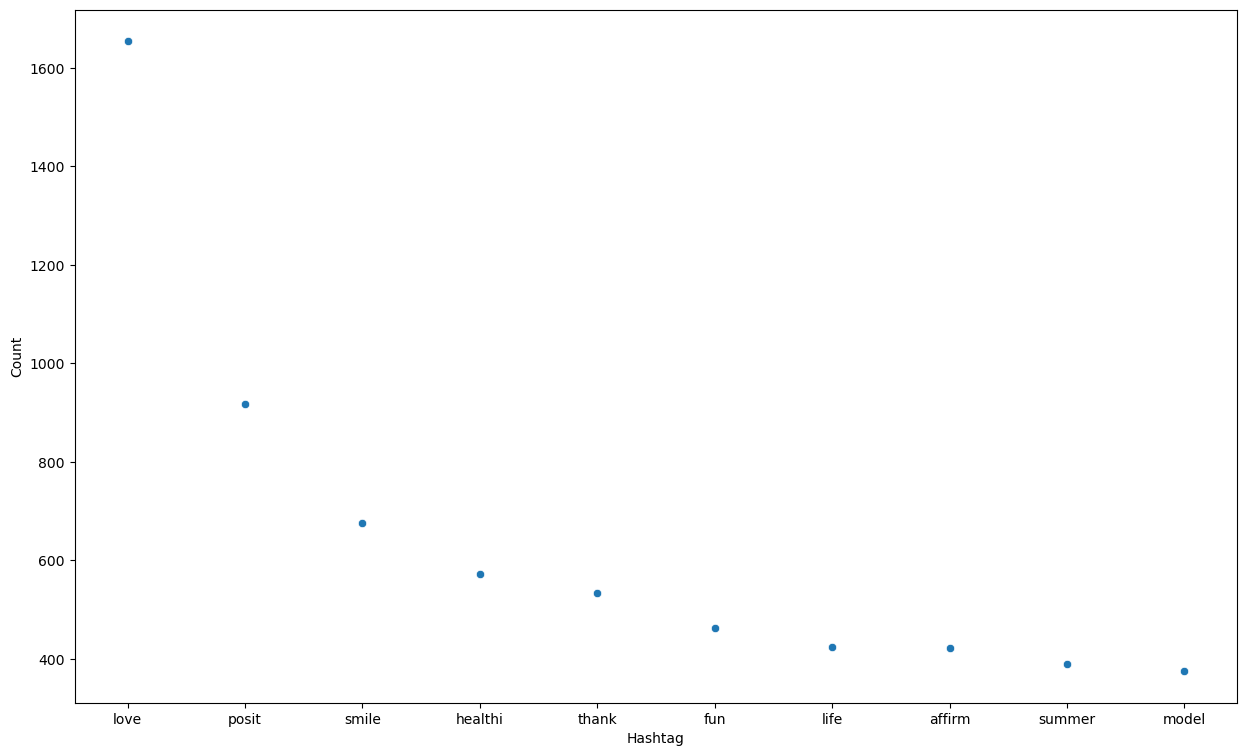

In [ ]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.scatterplot(data=d, x='Hashtag', y='Count')
plt.show()

<Figure size 1500x900 with 0 Axes>

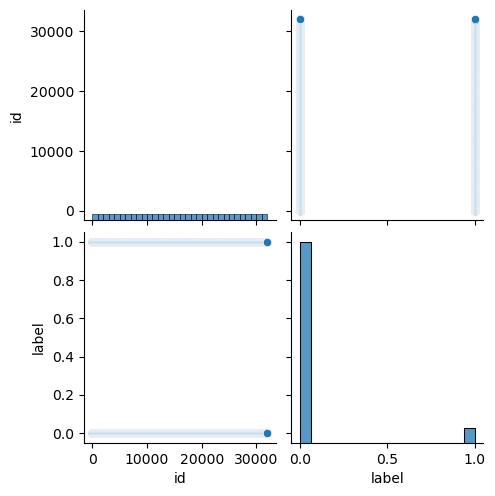

In [ ]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.pairplot(df)
plt.show()

In [ ]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


In [ ]:
d.tail()

,Hashtag,Count
1714,jumpedtheshark,1
1715,freemilo,5
1716,milo,4
1717,mailboxprid,1
1718,liberalism,1


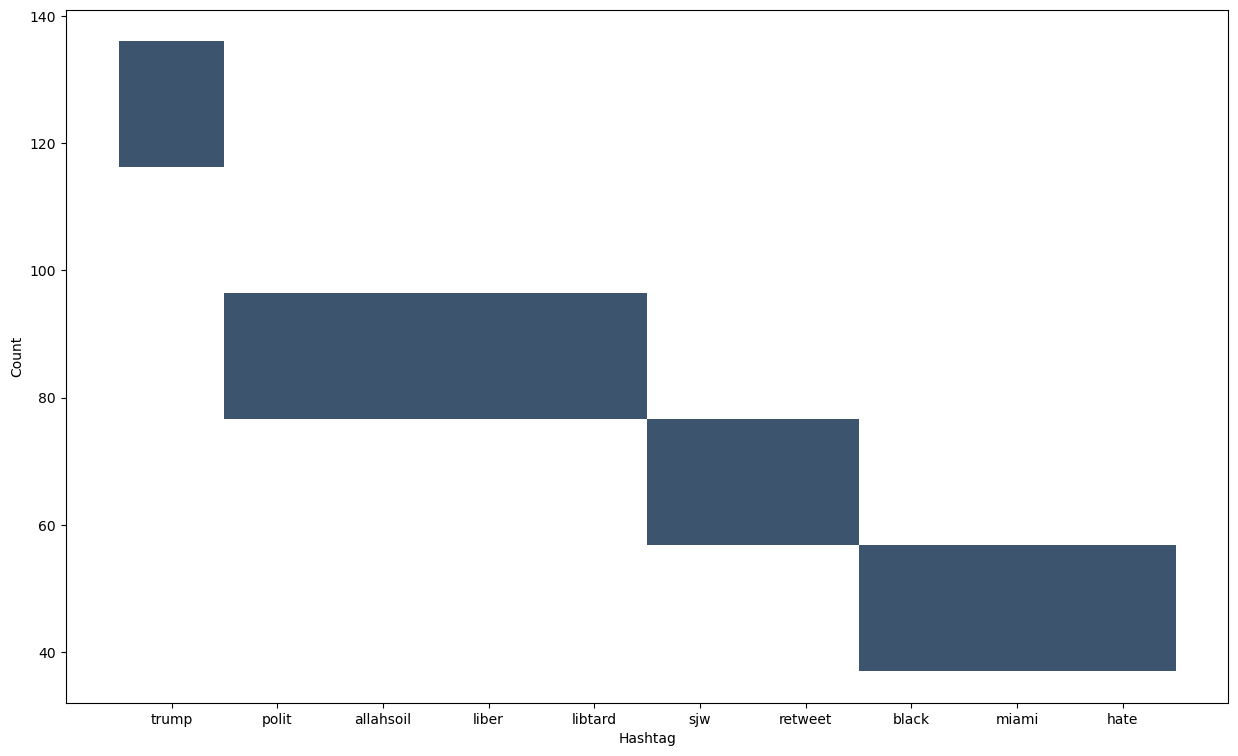

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.histplot(data=d, x='Hashtag', y='Count')
plt.show()

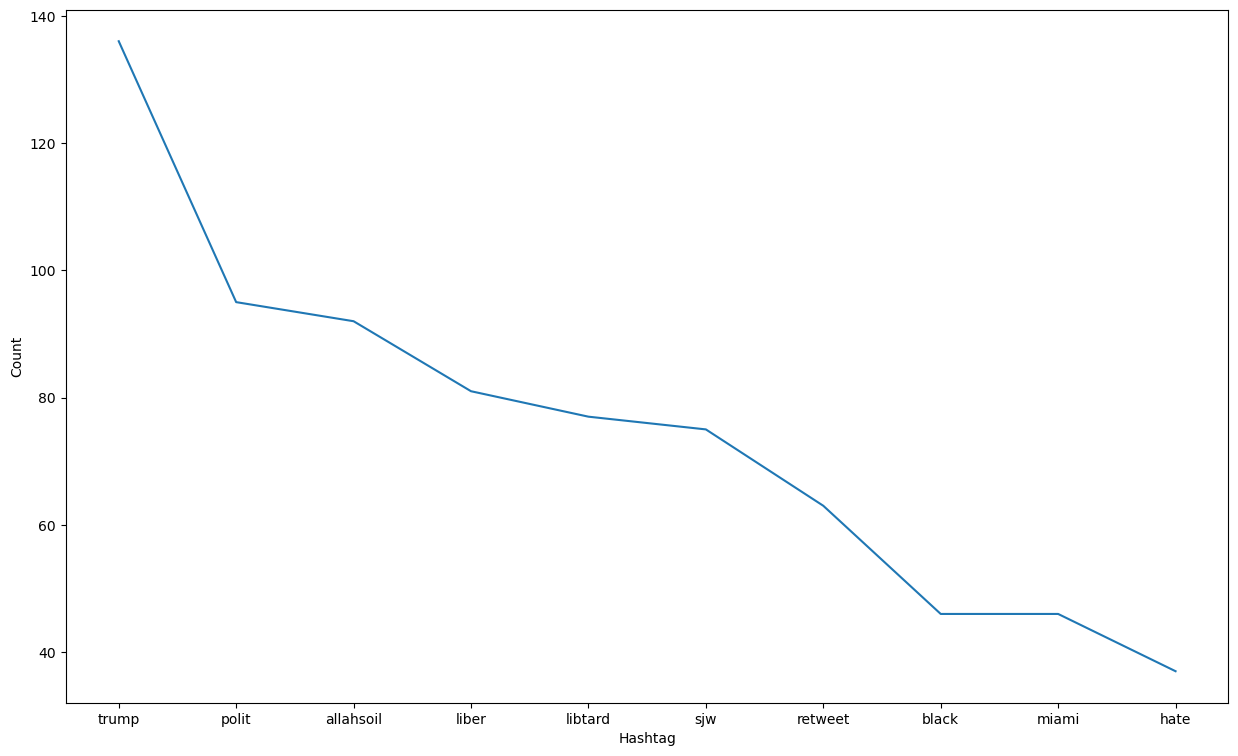

In [ ]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.lineplot(data=d, x='Hashtag', y='Count')
plt.show()

**Input Split**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming df is your DataFrame containing the 'clean_tweet' and 'label' columns

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['clean_tweet'])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(tfidf, df['label'], random_state=42, test_size=0.25)

# Initialize classifiers
logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()
svm_classifier = SVC()

# Train classifiers
logistic_regression.fit(x_train, y_train)
naive_bayes.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)

# Predictions
logistic_regression_pred = logistic_regression.predict(x_test)
naive_bayes_pred = naive_bayes.predict(x_test)
svm_pred = svm_classifier.predict(x_test)

# Evaluation metrics
results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [accuracy_score(y_test, logistic_regression_pred), 
                            precision_score(y_test, logistic_regression_pred), 
                            recall_score(y_test, logistic_regression_pred), 
                            f1_score(y_test, logistic_regression_pred)],
    'Naive Bayes': [accuracy_score(y_test, naive_bayes_pred), 
                    precision_score(y_test, naive_bayes_pred), 
                    recall_score(y_test, naive_bayes_pred), 
                    f1_score(y_test, naive_bayes_pred)],
    'SVM': [accuracy_score(y_test, svm_pred), 
            precision_score(y_test, svm_pred), 
            recall_score(y_test, svm_pred), 
            f1_score(y_test, svm_pred)]
}

# Create DataFrame
results_df = pd.DataFrame(results)
print("Performance Metrics:")
print(results_df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training and evaluating SVM model...
Near Miss SVM Accuracy: 0.8294314381270903
Near Miss SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       443
           1       0.83      0.84      0.83       454

    accuracy                           0.83       897
   macro avg       0.83      0.83      0.83       897
weighted avg       0.83      0.83      0.83       897

SMOTE SVM Accuracy: 0.9774562584118439
SMOTE SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5892
           1       0.96      0.99      0.98      5996

    accuracy                           0.98     11888
   macro avg       0.98      0.98      0.98     11888
weighted avg       0.98      0.98      0.98     11888


Training and evaluating Logistic Regression model...
Near Miss Logistic Regression Accuracy: 0.810479375696767
Near Miss Logistic Regression Classification 

['tfidf_vectorizer.joblib']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier()

# Train Random Forest Classifier
random_forest.fit(x_train, y_train)

# Predictions
random_forest_pred = random_forest.predict(x_test)

# Evaluation metrics for Random Forest
random_forest_metrics = [accuracy_score(y_test, random_forest_pred),
                         precision_score(y_test, random_forest_pred),
                         recall_score(y_test, random_forest_pred),
                         f1_score(y_test, random_forest_pred)]

# Update results dictionary
results['Random Forest'] = random_forest_metrics

# Create DataFrame
results_df = pd.DataFrame(results)
print("Performance Metrics:")
print(results_df)


Performance Metrics:
      Metric  Logistic Regression  Naive Bayes       SVM  Random Forest
0   Accuracy             0.947441     0.945313  0.949944       0.952572
1  Precision             0.790795     0.799020  0.816733       0.744565
2     Recall             0.338104     0.291592  0.366726       0.490161
3   F1-Score             0.473684     0.427261  0.506173       0.591154


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier()

# Train KNN Classifier
knn_classifier.fit(x_train, y_train)

# Predictions
knn_pred = knn_classifier.predict(x_test)

# Evaluation metrics for KNN
knn_metrics = [accuracy_score(y_test, knn_pred),
               precision_score(y_test, knn_pred),
               recall_score(y_test, knn_pred),
               f1_score(y_test, knn_pred)]

# Update results dictionary
results['KNN'] = knn_metrics

# Create DataFrame
results_df = pd.DataFrame(results)
print("Performance Metrics:")
print(results_df)


Performance Metrics:
      Metric  Logistic Regression  Naive Bayes       SVM  Random Forest  \
0   Accuracy             0.947441     0.945313  0.949944       0.952572   
1  Precision             0.790795     0.799020  0.816733       0.744565   
2     Recall             0.338104     0.291592  0.366726       0.490161   
3   F1-Score             0.473684     0.427261  0.506173       0.591154   

        KNN  
0  0.938681  
1  0.616162  
2  0.327370  
3  0.427570  


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Train Decision Tree Classifier
decision_tree.fit(x_train, y_train)

# Predictions
decision_tree_pred = decision_tree.predict(x_test)

# Evaluation metrics for Decision Tree Classifier
decision_tree_metrics = [accuracy_score(y_test, decision_tree_pred),
                         precision_score(y_test, decision_tree_pred),
                         recall_score(y_test, decision_tree_pred),
                         f1_score(y_test, decision_tree_pred)]

# Update results dictionary
results['Decision Tree'] = decision_tree_metrics

# Create DataFrame
results_df = pd.DataFrame(results)
print("Performance Metrics:")
print(results_df)


Performance Metrics:
      Metric  Logistic Regression  Naive Bayes       SVM  Random Forest  \
0   Accuracy             0.947441     0.945313  0.949944       0.952572   
1  Precision             0.790795     0.799020  0.816733       0.744565   
2     Recall             0.338104     0.291592  0.366726       0.490161   
3   F1-Score             0.473684     0.427261  0.506173       0.591154   

        KNN  Decision Tree  
0  0.938681       0.942185  
1  0.616162       0.614118  
2  0.327370       0.466905  
3  0.427570       0.530488  


In [ ]:
import joblib
# Creating a pickle file for the CountVectorizer
joblib.dump(tfidf_vectorizer, open('tfidf_vectorizer.joblib', 'wb'))

NameError: name 'tfidf_vectorizer' is not defined

In [ ]:
import joblib
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'random_forest.joblib'
joblib.dump(random_forest, open(filename, 'wb'))

NameError: name 'random_forest' is not defined